In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf

# Mengunggah file Excel
from google.colab import files
uploaded = files.upload()

# Membaca dataset dari file Excel
dataset = pd.read_excel('Dataset.xlsx')

# Define numeric feature columns
numeric_columns = ['Usia','Pertanyaan 1', 'Pertanyaan 2', 'Pertanyaan 3', 'Pertanyaan 4', 'Pertanyaan 5', 'Pertanyaan 6', 'Pertanyaan 7', 'Pertanyaan 8', 'Pertanyaan 9', 'Pertanyaan 10']
numeric_feature_columns = []
for column in numeric_columns:
    scaler = StandardScaler()
    dataset[column] = scaler.fit_transform(dataset[column].values.reshape(-1, 1))
    numeric_feature_columns.append(tf.keras.layers.Input(shape=(1,), name=column))

# Define categorical feature columns
categorical_columns = ['Domisili', 'Status Pekerjaan']
categorical_feature_columns = []
for column in categorical_columns:
    label_encoder = LabelEncoder()
    dataset[column] = label_encoder.fit_transform(dataset[column].values)
    num_classes = len(label_encoder.classes_)
    categorical_feature_columns.append(tf.keras.layers.Input(shape=(1,), name=column, dtype=tf.int32))

# Create the feature column list
feature_columns = numeric_feature_columns + categorical_feature_columns

# Convert x_train to TensorFlow dataset
def input_fn(features, labels, batch_size=32, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(features))
    dataset = dataset.batch(batch_size)
    return dataset

# Separate features and target variable
x_train = dataset.drop('Indikasi', axis=1)
y_train = dataset['Indikasi']

train_input_fn = lambda: input_fn(x_train, y_train)
train_dataset = train_input_fn()

Saving Dataset.xlsx to Dataset.xlsx


In [ ]:
for feature_batch, label_batch in train_dataset.take(1):
    print('Example features:', list(feature_batch.keys()))
    print('Example numeric feature:', feature_batch['Usia'])
    print('Example categorical feature:', feature_batch['Domisili'])
    print('Example label:', label_batch)

Example features: ['Usia', 'Domisili', 'Status Pekerjaan', 'Pertanyaan 1', 'Pertanyaan 2', 'Pertanyaan 3', 'Pertanyaan 4', 'Pertanyaan 5', 'Pertanyaan 6', 'Pertanyaan 7', 'Pertanyaan 8', 'Pertanyaan 9', 'Pertanyaan 10']
Example numeric feature: tf.Tensor(
[-0.1001278   0.22171155 -0.42196714 -1.06564582  2.79642629 -0.1001278
 -0.1001278  -0.1001278  -0.42196714 -0.74380648 -0.42196714 -0.42196714
  0.54355089 -0.1001278  -0.1001278  -0.42196714  0.22171155 -0.42196714
 -0.42196714 -0.42196714 -0.1001278  -0.1001278  -0.1001278  -0.42196714
 -0.42196714 -0.1001278  -0.42196714  0.22171155 -0.1001278  -0.1001278
  0.22171155  4.40562301], shape=(32,), dtype=float64)
Example categorical feature: tf.Tensor(
[ 2 23 50 27 36 38 43 17 39 13 48 27 46 50 49  4 11 44 13  5 35  4  8  4
 36  5 40 45 39  2  2  2], shape=(32,), dtype=int64)
Example label: tf.Tensor(
[b'Stres Berat' b'Stres Sedang' b'Stres Sedang' b'Stres Sedang'
 b'Stres Ringan' b'Stres Ringan' b'Stres Berat' b'Stres Sedang'
 b'Str

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Mengunggah file Excel
from google.colab import files
uploaded = files.upload()

# Membaca dataset dari file Excel
dataset = pd.read_excel('DataNew.xlsx')

# Define numeric feature columns
numeric_columns = ['Usia','Pertanyaan 1', 'Pertanyaan 2', 'Pertanyaan 3', 'Pertanyaan 4', 'Pertanyaan 5', 'Pertanyaan 6', 'Pertanyaan 7', 'Pertanyaan 8', 'Pertanyaan 9', 'Pertanyaan 10']
numeric_feature_columns = []
for column in numeric_columns:
    scaler = StandardScaler()
    dataset[column] = scaler.fit_transform(dataset[column].values.reshape(-1, 1))
    numeric_feature_columns.append(tf.feature_column.numeric_column(column))

# Define categorical feature columns
categorical_columns = ['Domisili', 'Status Pekerjaan']
categorical_feature_columns = []
for column in categorical_columns:
    label_encoder = LabelEncoder()
    dataset[column] = label_encoder.fit_transform(dataset[column].values)
    categorical_feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(column,
                                                                                                  vocabulary_list=label_encoder.classes_))

# Create the feature column list
feature_columns = numeric_feature_columns + categorical_feature_columns

# Convert x_train to TensorFlow dataset
def input_fn(features, labels, batch_size=32, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(features))
    dataset = dataset.batch(batch_size)
    return dataset

# Separate features and target variable
x_test = dataset.drop('Indikasi', axis=1)
y_test = dataset['Indikasi']

test_input_fn = lambda: input_fn(x_test, y_test, shuffle=False)
test_dataset = test_input_fn()

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


Saving DataNew.xlsx to DataNew.xlsx


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from keras.utils import to_categorical
import pandas as pd
import numpy as np

# Preprocess the numerical features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Preprocess the categorical features using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Updated parameter
x_train_encoded = encoder.fit_transform(x_train[categorical_columns])

# Combine numerical and encoded categorical features
x_train_final = np.concatenate((x_train_scaled, x_train_encoded), axis=1)

# Preprocess the categorical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)

# Scale numerical features for test data
x_test_scaled = scaler.transform(x_test)

# Encode categorical features for test data using the same encoder
x_test_encoded = encoder.transform(x_test[categorical_columns])

# Combine numerical and encoded categorical features for test data
x_test_final = np.concatenate((x_test_scaled, x_test_encoded), axis=1)

# Preprocess the categorical labels for test data
y_test_encoded = label_encoder.transform(y_test)  # Use the same label encoder
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)  # Convert to one-hot encoding

In [ ]:
from tensorflow.keras import layers, models

# Determine the largest input dimension between training and evaluation
max_input_dim = max(x_train_final.shape[1], x_test_final.shape[1])

# Adjust the input dimensions for training data
x_train_final = np.pad(x_train_final, ((0, 0), (0, max_input_dim - x_train_final.shape[1])), mode='constant')

# Adjust the input dimensions for evaluation data
x_test_final = np.pad(x_test_final, ((0, 0), (0, max_input_dim - x_test_final.shape[1])), mode='constant')

# Adjust the input dimensions in the model to match max_input_dim
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(max_input_dim,)))  # Input layer dengan dimensi yang fleksibel
model.add(layers.Dense(64, activation='relu'))  # Hidden layer
model.add(layers.Dense(num_classes, activation='softmax')) # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_final, y_train_one_hot, epochs=15, batch_size=32)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:593: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4702 - loss: 1.0476
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - loss: 0.8541 
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7362 - loss: 0.7130 
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8216 - loss: 0.5889 
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8355 - loss: 0.5263 
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8938 - loss: 0.4528 
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9163 - loss: 0.3940 
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9486 - loss: 0.3445 
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9338 - loss: 0.3079 
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9525 - loss: 0.2655 
Epoch 11/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9650 - loss: 0.2331 
Epoch 12/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9484 - loss: 0.2258 
Epoch 13/15
8

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │           4,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,315 (102.80 KB)

 Trainable params: 8,771 (34.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,544 (68.54 KB)

In [ ]:
print("x_test_scaled shape:", x_test_scaled.shape)
print("x_test_encoded shape:", x_test_encoded.shape)
print("x_test_final shape:", x_test_final.shape)

x_test_scaled shape: (75, 13)
x_test_encoded shape: (75, 55)
x_test_final shape: (75, 68)


In [ ]:
# Adjust the input dimensions for evaluation data
x_test_final = np.pad(x_test_final, ((0, 0), (0, max_input_dim - x_test_final.shape[1])), mode='constant')

# Evaluate Model
loss, accuracy = model.evaluate(x_test_final, y_test_one_hot)
print("Loss:", loss)
print("Accuracy:", accuracy)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9076 - loss: 0.3010  
Loss: 0.3209676444530487
Accuracy: 0.8933333158493042


Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9652 - loss: 0.1601 - val_accuracy: 0.8667 - val_loss: 0.3246
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9885 - loss: 0.1237 - val_accuracy: 0.8667 - val_loss: 0.3370
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9835 - loss: 0.1315 - val_accuracy: 0.8533 - val_loss: 0.3397
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9835 - loss: 0.1088 - val_accuracy: 0.8400 - val_loss: 0.3411
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9864 - loss: 0.0933 - val_accuracy: 0.8267 - val_loss: 0.3654
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9862 - loss: 0.0876 - val_accuracy: 0.8400 - val_loss: 0.3601
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9873 - loss: 0.0775 - val_accuracy: 0.8533 - val_loss: 0.3401
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9952 - loss: 0.0744 - val_accuracy: 0.8400 - val_loss: 0.3416
Epoch 9

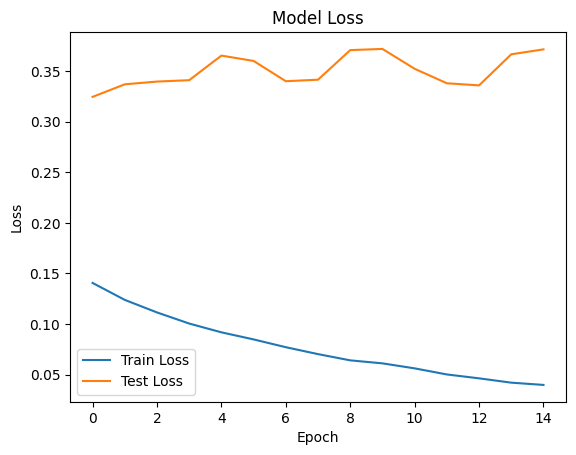

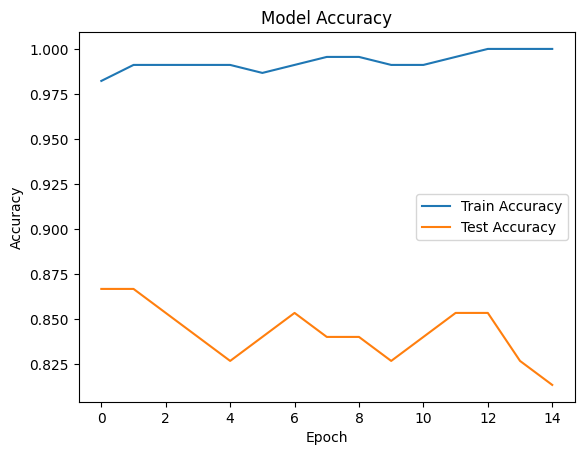

In [ ]:
import matplotlib.pyplot as plt

# Train Model
history = model.fit(x_train_final, y_train_one_hot, epochs=15, batch_size=32, validation_data=(x_test_final, y_test_one_hot))

# Show plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Show plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Dictionary untuk mengonversi nilai integer menjadi string
label_dict = {0: 'Stres Ringan', 1: 'Stres Sedang', 2: 'Stres Berat'}

# Memprediksi label pada data test
y_pred_one_hot = model.predict(x_test_final)
y_pred_labels = np.argmax(y_pred_one_hot, axis=1)
y_pred_labels_str = [label_dict[label] for label in y_pred_labels]

# Mengonversi one-hot encoded labels menjadi label asli
y_test_labels = np.argmax(y_test_one_hot, axis=1)
y_test_labels_str = [label_dict[label] for label in y_test_labels]

# Membandingkan predicted labels dengan actual labels
for i in range(len(y_pred_labels_str)):
    print("Actual Label:", y_test_labels_str[i])
    print("Predicted Label:", y_pred_labels_str[i])
    print()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Actual Label: Stres Sedang
Predicted Label: Stres Sedang

Actual Label: Stres Berat
Predicted Label: Stres Berat

Actual Label: Stres Ringan
Predicted Label: Stres Ringan

Actual Label: Stres Sedang
Predicted Label: Stres Sedang

Actual Label: Stres Ringan
Predicted Label: Stres Ringan

Actual Label: Stres Berat
Predicted Label: Stres Berat

Actual Label: Stres Berat
Predicted Label: Stres Berat

Actual Label: Stres Berat
Predicted Label: Stres Berat

Actual Label: Stres Sedang
Predicted Label: Stres Sedang

Actual Label: Stres Sedang
Predicted Label: Stres Sedang

Actual Label: Stres Berat
Predicted Label: Stres Sedang

Actual Label: Stres Berat
Predicted Label: Stres Ringan

Actual Label: Stres Berat
Predicted Label: Stres Berat

Actual Label: Stres Sedang
Predicted Label: Stres Sedang

Actual Label: Stres Ringan
Predicted Label: Stres Ringan

Actual Label: Stres Ringan
Predicted Label: Stres Ringan

Actual Label: Stres Sedang
Predicted Label: St

In [ ]:
import tensorflow as tf
import os
import zipfile

# Assuming 'model' is your trained model
model.save('model.h5')

# Convert model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
tflite_filename = 'model.tflite'
with open(tflite_filename, 'wb') as f:
    f.write(tflite_model)

# Create a zip file
zip_filename = 'model.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    # Add the TensorFlow Lite model file to the zip
    zipf.write(tflite_filename)

# Download the zip file
from google.colab import files
files.download(zip_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>